# FoodShare-v0 Analysis

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt

save_root = "data/FoodShare-v0/"

file_path = save_root + "data_all.json"
with open(file_path, 'r') as json_file:
    data_fs = json.load(json_file)

In [6]:
PASS_ACTION = 1

FULL = 1
HUNGRY = 0

n_types = len(data_fs.keys())
n_agents = len(data_fs["no"]["action"].keys())
agent_types = ["no", "cognitive", "affective", "full"]

print(data_fs.keys())
print(data_fs["no"].keys())
print(data_fs["no"]["action"].keys())
print(np.array(data_fs["no"]["action"]["0"]).shape)

dict_keys(['no', 'channel', 'reward', 'full'])
dict_keys(['possessor_energy', 'partner_energy', 'action'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])
(1, 1000)


In [7]:
print(np.array(data_fs["no"]["action"]["0"])[0, :20])  
print(np.array(data_fs["no"]["possessor_energy"]["0"])[0, :20])
print(np.array(data_fs["no"]["partner_energy"]["0"])[0, :20])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Plotting the rates of PASS action in each condition

[[0.049 0.029 0.038 0.051 0.061 0.039 0.08  0.051 0.048 0.034 0.06  0.036
  0.064 0.159 0.042 0.03  0.044 0.044 0.03  0.05 ]
 [0.028 0.048 0.217 0.068 0.039 0.062 0.019 0.05  0.057 0.062 0.051 0.045
  0.039 0.035 0.051 0.037 0.05  0.04  0.038 0.029]
 [0.775 0.701 0.805 0.769 0.8   0.808 0.795 0.643 0.844 0.711 0.828 0.736
  0.76  0.796 0.803 0.652 0.728 0.772 0.814 0.794]
 [0.235 0.304 0.602 0.257 0.357 0.626 0.463 0.251 0.511 0.269 0.233 0.503
  0.294 0.302 0.316 0.378 0.353 0.476 0.351 0.232]]
[0.05195 0.05325 0.7667  0.36565] [0.0275889  0.03945615 0.05405469 0.12003344]


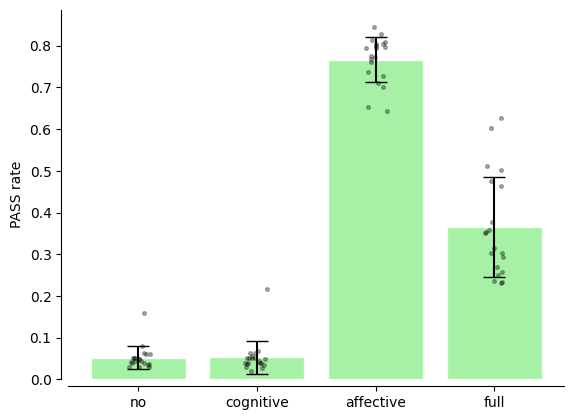

In [8]:
rate_pass_action = np.zeros((n_types, n_agents))

for i, type_ in enumerate(data_fs):
    for j, agent_id in enumerate(data_fs[type_]["action"]):
        rate_pass_action[i, j] = (np.array(data_fs[type_]["action"][agent_id][0]) == 1).mean()

mean_rate_pass_action = np.mean(rate_pass_action, axis=1)
std_pass_action = np.std(rate_pass_action, axis=1)

print(rate_pass_action)
print(mean_rate_pass_action, std_pass_action)

fig, ax = plt.subplots()
bars = ax.bar(agent_types, mean_rate_pass_action, yerr=std_pass_action,
              color='lightgreen', edgecolor='white', alpha=0.8, capsize=8)
for i, point in enumerate(rate_pass_action):
    ax.scatter(i + np.random.uniform(-0.1, 0.1, len(point)), point, color='k', s=7, alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optionally, you can also adjust the bottom and left spines
ax.spines['left'].set_position(('outward', 5))  # Move the left spine outward
ax.spines['bottom'].set_position(('outward', 5))  # Move the bottom spine outward

# plt.xlabel("Agent types")
plt.ylabel("PASS rate")

# plt.show()
plt.savefig(save_root + "/PASS_rate.pdf")

### Checking if the PASS action is taken when the partner is HUNGRY

[[23. 17. 18. 24. 26. 20. 34. 25. 26. 17. 33. 20. 29. 53. 16. 11. 19. 18.
  16. 20.]
 [14. 22. 58. 33. 18. 29. 12. 29. 31. 26. 29. 16. 19. 22. 30. 23. 19. 17.
  17. 14.]
 [14. 39. 22. 23. 21. 17. 18. 41. 20. 26. 25. 25. 31. 12. 14. 48. 19. 17.
  24. 20.]
 [66. 62. 47. 74. 49. 34. 53. 67. 43. 69. 73. 44. 75. 60. 60. 73. 57. 64.
  70. 83.]]


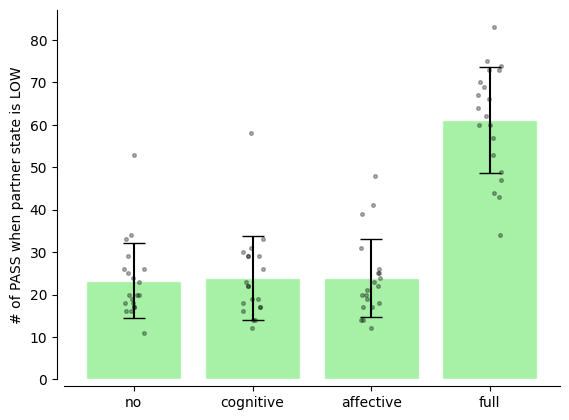

In [9]:
num_pass_when_partner_hungry = np.zeros((n_types, n_agents))

for i, type_ in enumerate(data_fs):
    for j, agent_id in enumerate(data_fs[type_]["action"]):
        partner_hungry = np.array(data_fs[type_]["partner_energy"][agent_id][0]) == HUNGRY
        pass_action = np.array(data_fs[type_]["action"][agent_id][0]) == PASS_ACTION
        num_pass_when_partner_hungry[i, j] = (partner_hungry[:-1] * pass_action[1:]).sum()

mean_num_pass_when_partner_hungry = num_pass_when_partner_hungry.mean(axis=1)
std_num_pass_when_partner_hungry = num_pass_when_partner_hungry.std(axis=1)

print(num_pass_when_partner_hungry)

fig, ax = plt.subplots()
bars = ax.bar(agent_types, mean_num_pass_when_partner_hungry, yerr=std_num_pass_when_partner_hungry,
              color='lightgreen', edgecolor='white', alpha=0.8, capsize=8)

for i, point in enumerate(num_pass_when_partner_hungry):
    ax.scatter(i + np.random.uniform(-0.1, 0.1, len(point)), point, color='k', s=7, alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optionally, you can also adjust the bottom and left spines
ax.spines['left'].set_position(('outward', 5))  # Move the left spine outward
ax.spines['bottom'].set_position(('outward', 5))  # Move the bottom spine outward

# plt.xlabel("Agent types")
plt.ylabel("# of PASS when partner state is LOW")

# plt.show()
plt.savefig(save_root + "/PASS_when_partner_HUNGRY.pdf")

[[23. 17. 18. 24. 26. 20. 34. 25. 26. 17. 33. 20. 29. 53. 16. 11. 19. 18.
  16. 20.]
 [14. 22. 58. 33. 18. 29. 12. 29. 31. 26. 29. 16. 19. 22. 30. 23. 19. 17.
  17. 14.]
 [14. 39. 22. 23. 21. 17. 18. 41. 20. 26. 25. 25. 31. 12. 14. 48. 19. 17.
  24. 20.]
 [66. 62. 47. 74. 49. 34. 53. 67. 43. 69. 73. 44. 75. 60. 60. 73. 57. 64.
  70. 83.]]


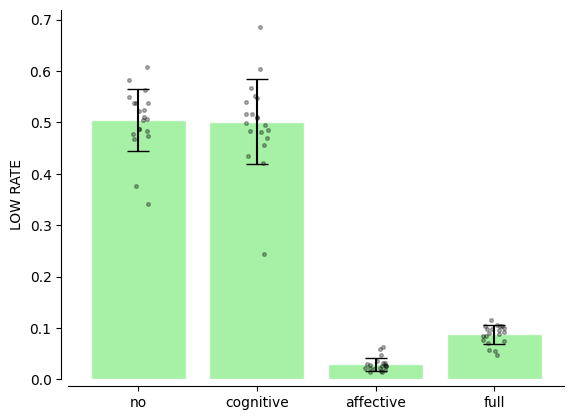

In [10]:
rate_partner_hungry = np.zeros((n_types, n_agents))

for i, type_ in enumerate(data_fs):
    for j, agent_id in enumerate(data_fs[type_]["partner_energy"]):
        rate_partner_hungry[i, j] = (np.array(data_fs[type_]["partner_energy"][agent_id][0]) == HUNGRY).mean()

mean_rate_partner_hungry = rate_partner_hungry.mean(axis=1)
std_rate_partner_hungry = rate_partner_hungry.std(axis=1)

print(num_pass_when_partner_hungry)

fig, ax = plt.subplots()
bars = ax.bar(agent_types, mean_rate_partner_hungry, yerr=std_rate_partner_hungry,
              color='lightgreen', edgecolor='white', alpha=0.8, capsize=8)

for i, point in enumerate(rate_partner_hungry):
    ax.scatter(i + np.random.uniform(-0.1, 0.1, len(point)), point, color='k', s=7, alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optionally, you can also adjust the bottom and left spines
ax.spines['left'].set_position(('outward', 5))  # Move the left spine outward
ax.spines['bottom'].set_position(('outward', 5))  # Move the bottom spine outward

# plt.xlabel("Agent types")
plt.ylabel("LOW RATE")

# plt.show()
plt.savefig(save_root + "/LOW_RATE_PARTNER.pdf")

# GridRooms-v0 Analysis

In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

save_root = "data/GridRooms-v0/"
file_path = save_root + "data_all.json"
with open(file_path, 'r') as json_file:
    data_gr = json.load(json_file)

In [12]:
PASS_ACTION = 1

TARGET_ENERGY = 0.0
GRID_SIZE = 5
PASS_ACTION = 4
HAVE_FOOD = True
# 0: move left (movable agent)
# 1: move right (movable agent)
# 2: get (get food)
# 3: consume food if the agent "has food"
# 4: pass food if the agent "has food" and at rightmost position

n_types = len(data_gr.keys())
n_agents = len(data_gr["no"]["action"].keys())

print(data_gr.keys())
print(data_gr["no"].keys())
print(data_gr["no"]["action"].keys())
print(np.array(data_gr["no"]["action"]["0"]).shape)

dict_keys(['no', 'channel', 'reward', 'full'])
dict_keys(['possessor_energy', 'action', 'have_food', 'position', 'partner_energy'])
dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])
(1, 2000)


### Sample plot of Internal States

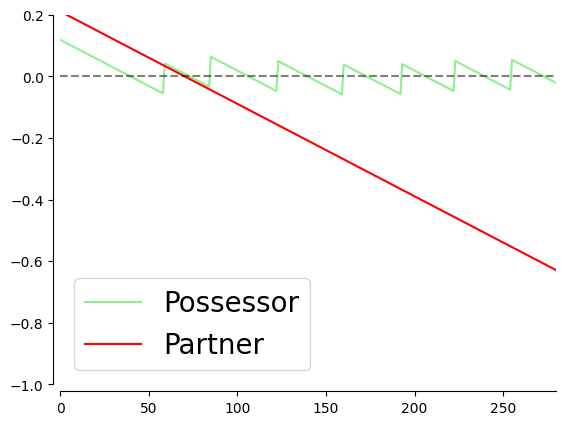

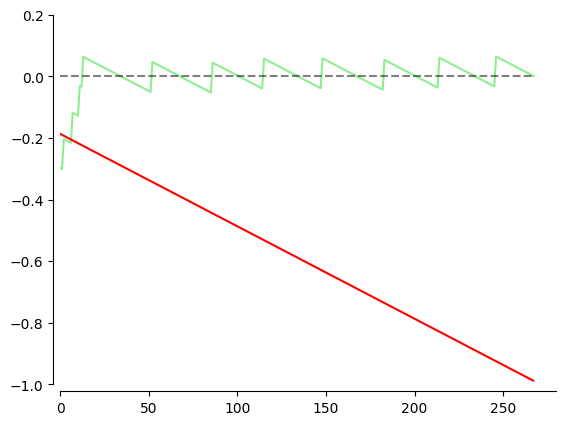

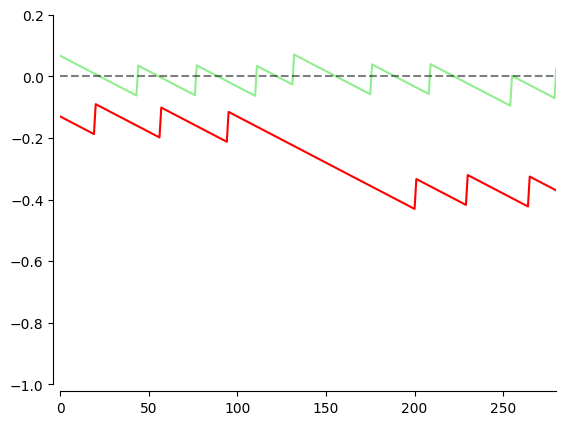

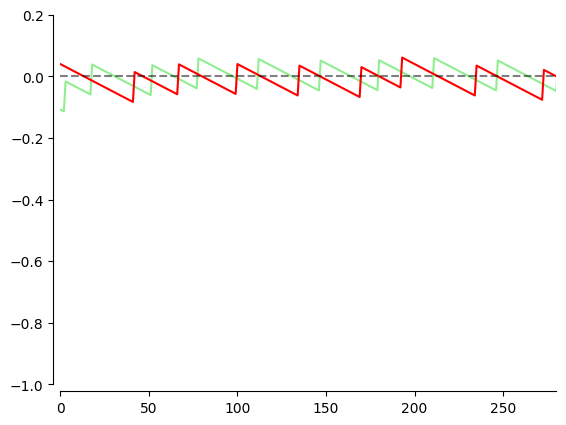

In [24]:
agent_id = "8"


for i, type_ in enumerate(data_gr):
    fig, ax = plt.subplots()
    tmp = np.where(np.array(data_gr[type_]["partner_energy"][agent_id][0]) < -0.99)[0]
    if len(tmp) > 0:
        survival_time_steps = tmp[0]
        ax.plot(data_gr[type_]["possessor_energy"][agent_id][0][:survival_time_steps], c="lightgreen", label="Possessor")
        ax.plot(data_gr[type_]["partner_energy"][agent_id][0][:survival_time_steps], c="red", label="Partner")
        ax.plot([0, survival_time_steps], [0, 0], "--k", alpha=0.5)
    else:
        ax.plot(data_gr[type_]["possessor_energy"][agent_id][0], c="lightgreen", label="Possessor")
        ax.plot(data_gr[type_]["partner_energy"][agent_id][0], c="red", label="Partner")
        ax.plot([0, len(data_gr[type_]["possessor_energy"][agent_id][0])], [0, 0], "--k", alpha=0.5)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_position(('outward', 5))  # Move the left spine outward
    ax.spines['bottom'].set_position(('outward', 5))  # Move the bottom spine outward
    
    plt.ylim([-1.0, 0.2])
    plt.xlim([0, 280])
    
    if i == 0:
        ax.legend(fontsize=20)

    
    # plt.show()
    plt.savefig(save_root + f"InternalState_{type_}_v2.pdf", transparent=True)

### Plotting Squared Error of Posessor and Partner in each condition

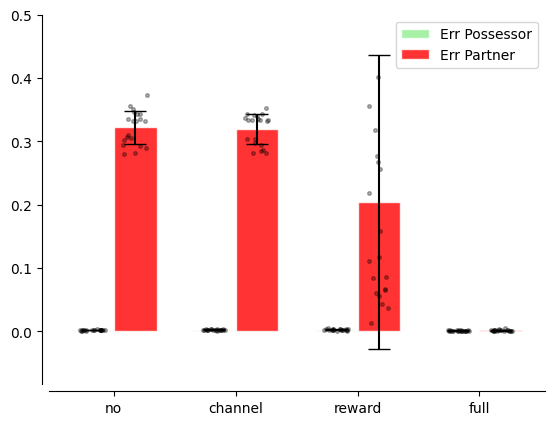

In [9]:
interoceptive_error = np.zeros((n_types, 2, n_agents))

for i, type_ in enumerate(data_gr):
    for j, agent_id_ in enumerate(data_gr[type_]["action"]):
        possessor_energy_err = (np.array(data_gr[type_]["possessor_energy"][agent_id_][0]) - TARGET_ENERGY) ** 2
        partner_energy_err = (np.array(data_gr[type_]["partner_energy"][agent_id_][0]) - TARGET_ENERGY) ** 2
        interoceptive_error[i, 0, j] = possessor_energy_err.mean()
        interoceptive_error[i, 1, j] = partner_energy_err.mean()

mean_interoceptive_err = interoceptive_error.mean(axis=2)
std_interoceptive_err = interoceptive_error.std(axis=2)

width = 0.35
fig, ax = plt.subplots()
bars = ax.bar(np.arange(len(data_fs.keys())) - width/2, mean_interoceptive_err[:, 0], yerr=std_interoceptive_err[:, 0],
              color='lightgreen', edgecolor='white', alpha=0.8, capsize=8, width=width, label="Err Possessor")
bars = ax.bar(np.arange(len(data_fs.keys())) + width/2, mean_interoceptive_err[:, 1], yerr=std_interoceptive_err[:, 1],
              color='red', edgecolor='white', alpha=0.8, capsize=8, width=width, label="Err Partner")

for i, point in enumerate(interoceptive_error):
    ax.scatter(i + np.random.uniform(-0.1, 0.1, len(point[0])) - width/2, point[0], color='k', s=7, alpha=0.3)
    ax.scatter(i + np.random.uniform(-0.1, 0.1, len(point[0])) + width/2, point[1], color='k', s=7, alpha=0.3)

ax.set_xticks(range(len(data_fs.keys())))
ax.set_xticklabels(data_fs.keys())

ax.set_ylim(ymax=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Optionally, you can also adjust the bottom and left spines
ax.spines['left'].set_position(('outward', 5))  # Move the left spine outward
ax.spines['bottom'].set_position(('outward', 5))  # Move the bottom spine outward

ax.legend()
# plt.show()
plt.savefig(save_root + f"SquaredErrors.pdf")

### Energy level of partner when food was passed by possessor

no 0 (0,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 61 (61,)
[0 0 0 ... 0 0 0]
full 62 (62,)
[0 0 0 ... 0 0 0]
no 20 (20,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 65 (65,)
[0 0 0 ... 0 0 0]
full 58 (58,)
[0 0 0 ... 0 1 0]
no 0 (0,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 55 (55,)
[0 0 0 ... 0 0 0]
full 61 (61,)
[0 0 0 ... 0 0 0]
no 0 (0,)
[0 0 0 ... 0 0 0]
channel 1 (1,)
[0 0 0 ... 0 0 0]
reward 48 (48,)
[0 0 0 ... 0 0 0]
full 61 (61,)
[0 0 0 ... 0 0 0]
no 0 (0,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 64 (64,)
[0 0 0 ... 0 0 0]
full 59 (59,)
[0 0 0 ... 0 0 1]
no 0 (0,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 56 (56,)
[0 0 0 ... 0 0 0]
full 59 (59,)
[0 0 0 ... 0 0 0]
no 4 (4,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 45 (45,)
[0 0 0 ... 0 0 0]
full 59 (59,)
[0 0 0 ... 0 0 0]
no 0 (0,)
[0 0 0 ... 0 0 0]
channel 0 (0,)
[0 0 0 ... 0 0 0]
reward 52 (52,)
[0 0 0 ... 0 0 0]
full 61 (61,)


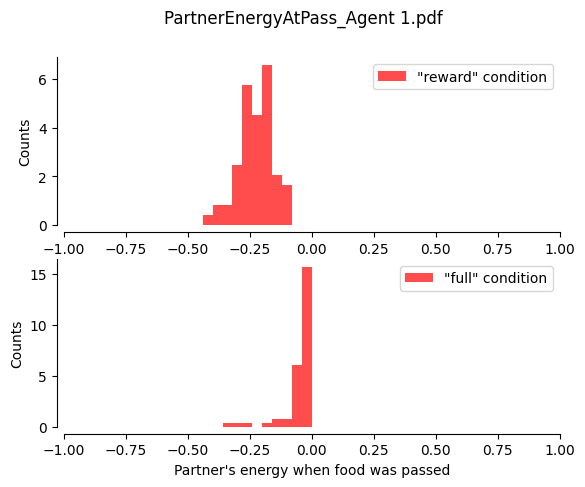

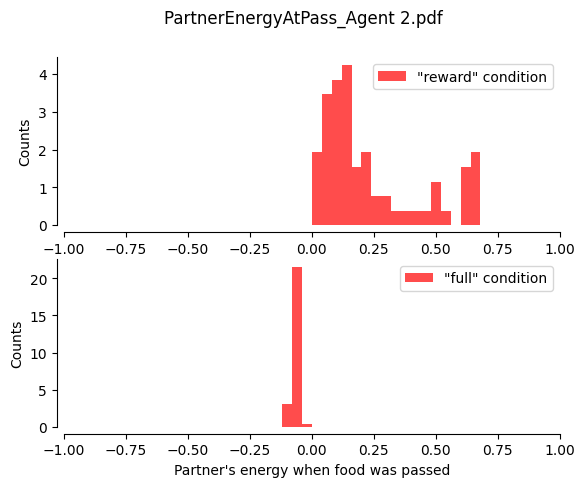

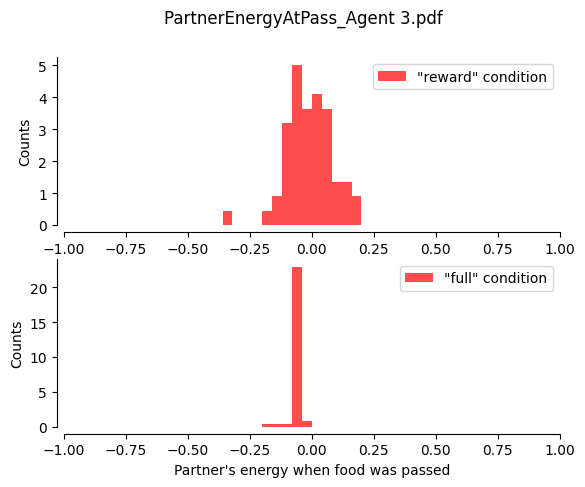

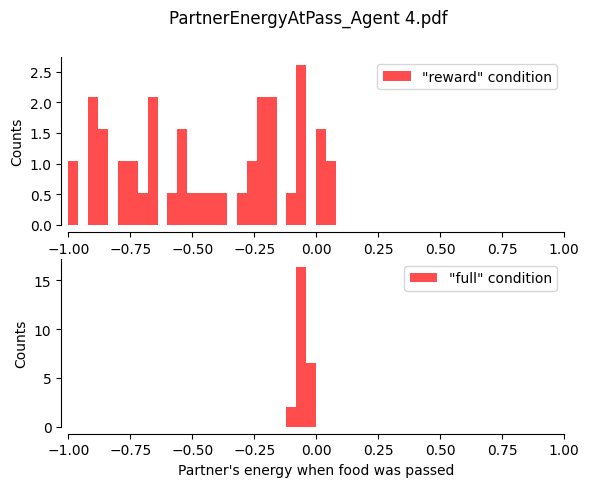

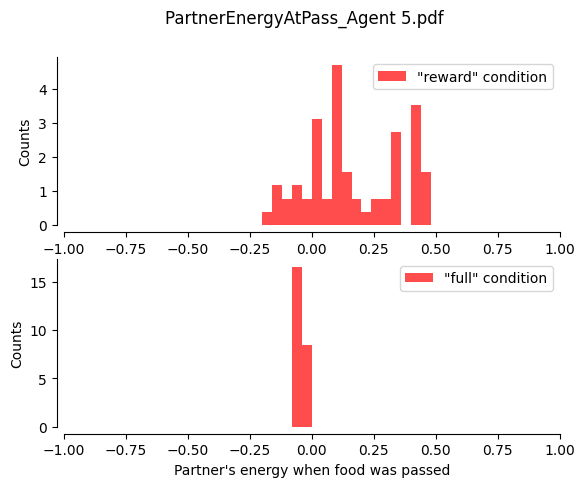

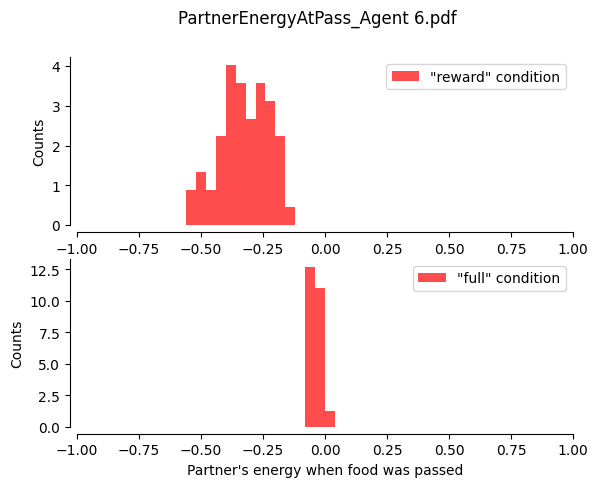

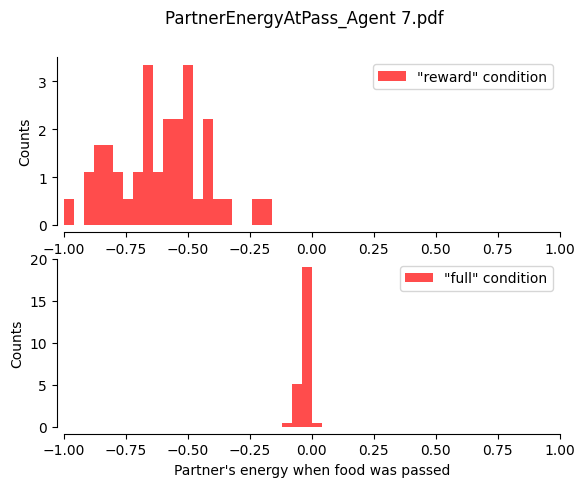

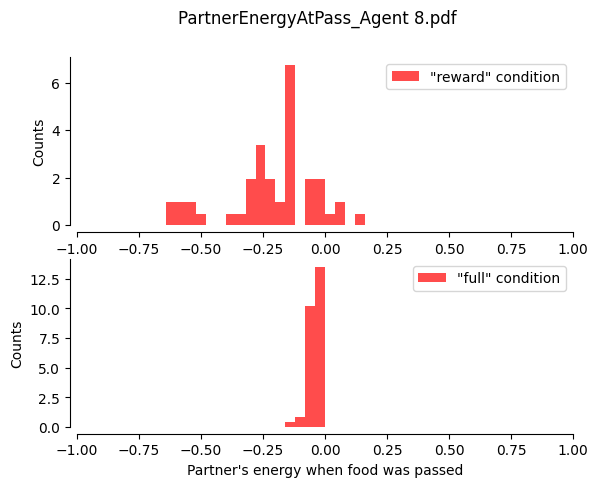

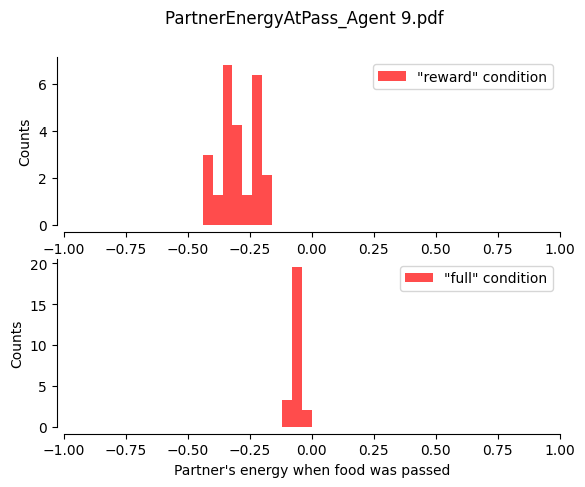

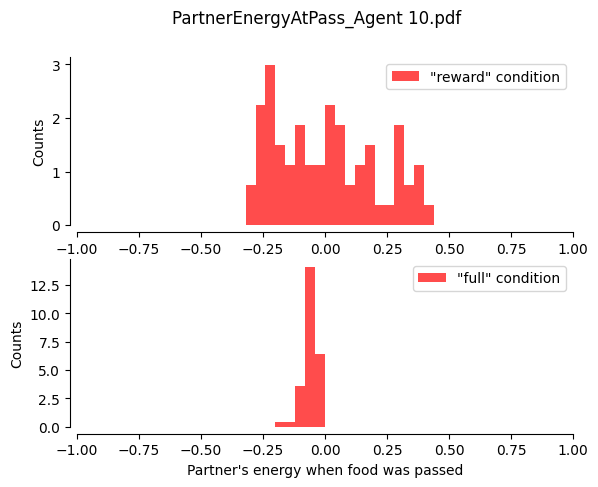

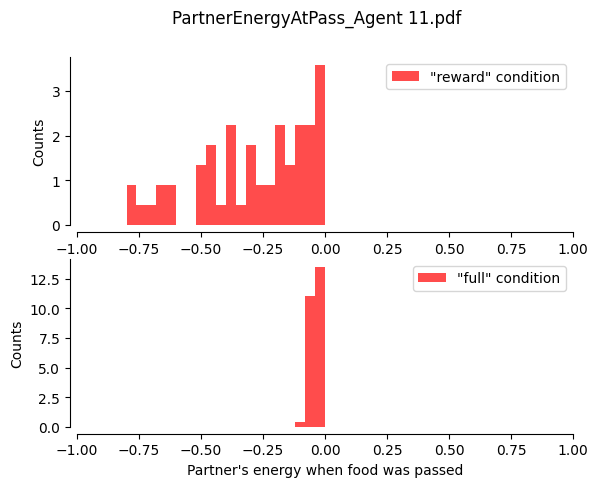

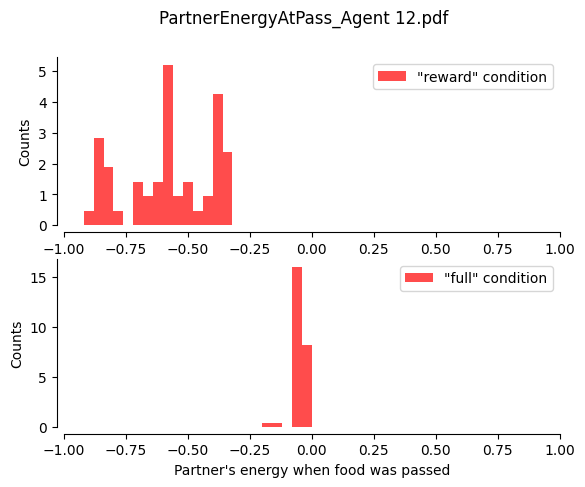

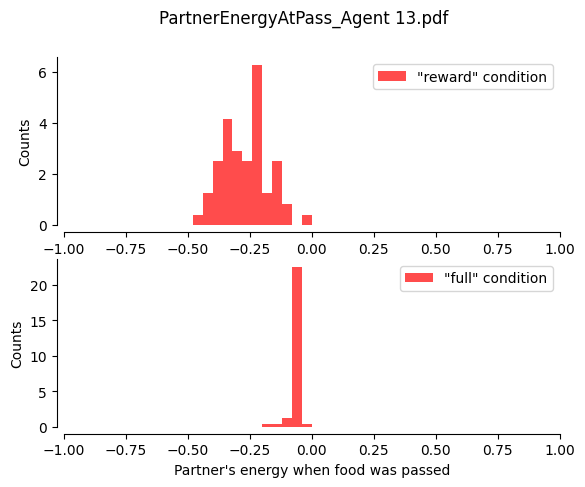

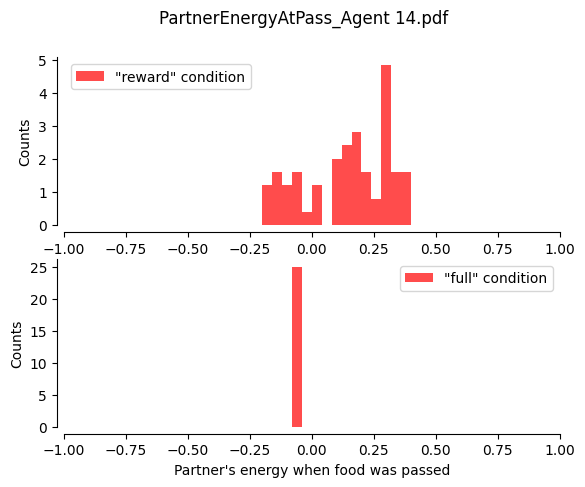

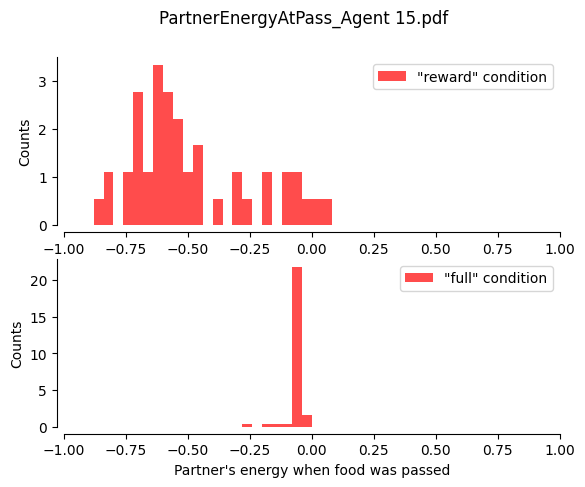

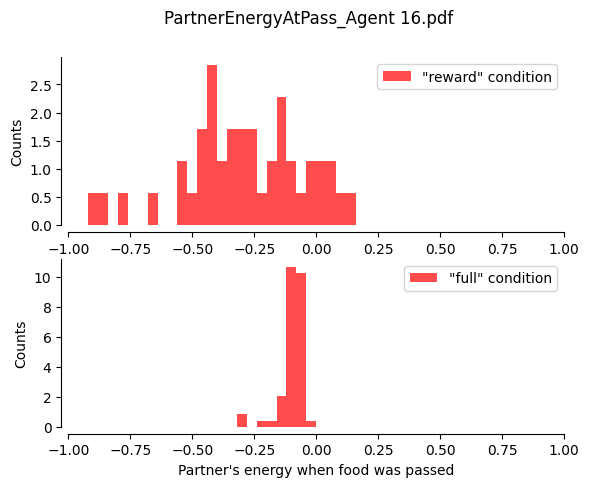

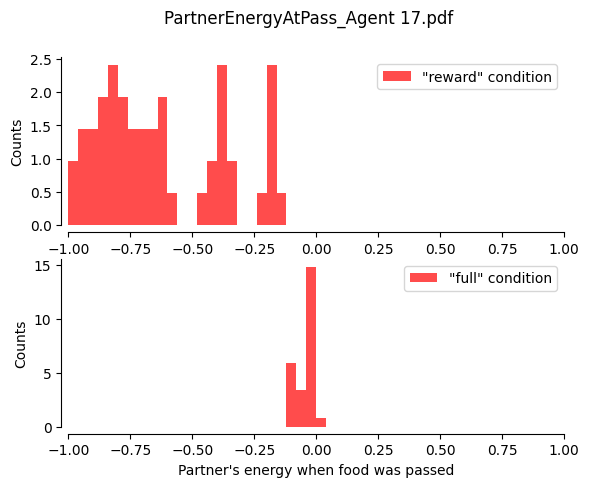

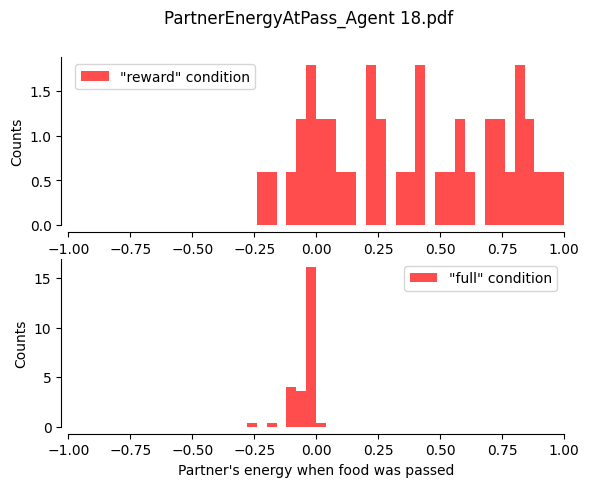

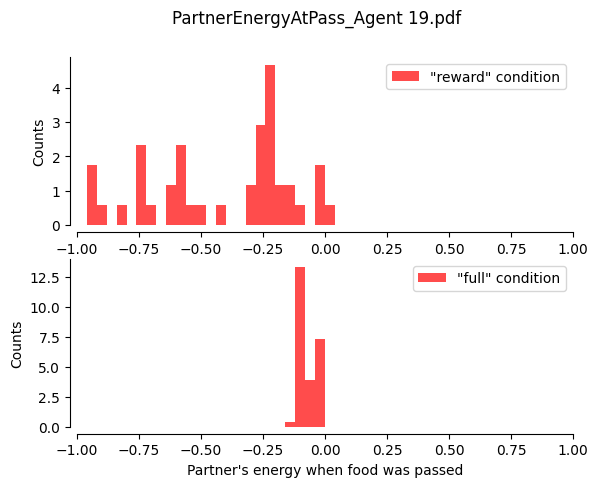

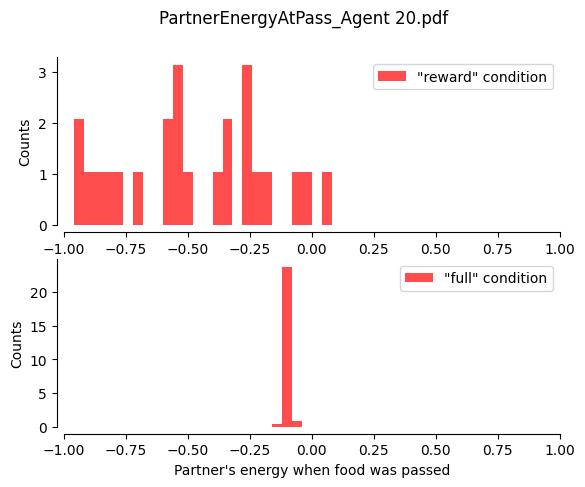

In [10]:
for agent_id in data_gr["no"]["action"]:
    num_pass_when_next_to_partner = np.zeros((n_types, n_agents))

    n = 1
    fig, ax = plt.subplots(2, 1)

    for i, type_ in enumerate(data_gr):
        have_food = np.array(data_gr[type_]["have_food"][agent_id][0])
        pos_possessor = np.array(data_gr[type_]["position"][agent_id][0]) == (GRID_SIZE - 1)
        pass_action = np.array(data_gr[type_]["action"][agent_id][0]) == PASS_ACTION

        # possessor has food and next to the partner and then pass action
        pass_when_next_to_partner = have_food[:-1] * pos_possessor[:-1] * pass_action[1:]

        # partner's energy when passed food
        partner_energy = np.array(data_gr[type_]["partner_energy"][agent_id][0])[:-1]
        partner_energy_when_passed = partner_energy[pass_when_next_to_partner == True]
        print(type_, pass_when_next_to_partner.sum(), partner_energy_when_passed.shape)
        print(pass_when_next_to_partner)

        if type_ in {"reward", "full"}:

            ax[n-1].hist(partner_energy_when_passed, bins=50, range=(-1, 1), density=True, color="r", alpha=0.7, label='"' + type_+ '"' + " condition")
            ax[n-1].set_xlim(xmin=-1, xmax=1)
            ax[n-1].set_ylabel("Counts")
            ax[n-1].legend()

            ax[n-1].spines['top'].set_visible(False)
            ax[n-1].spines['right'].set_visible(False)

            ax[n-1].spines['left'].set_position(('outward', 5))  # Move the left spine outward
            ax[n-1].spines['bottom'].set_position(('outward', 5))  # Move the bottom spine outward

            n += 1

    plt.xlabel("Partner's energy when food was passed")
    fig.suptitle("PartnerEnergyAtPass_Agent " + str(int(agent_id)+1) + ".pdf")

    #plt.show()
    plt.savefig(save_root + f"Agents_{agent_id}.pdf")